In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
import time
import math
from collections import Counter

In [2]:
file_name = "airports.csv"
airports = pd.read_csv(file_name)
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [3]:
file_name = "airlines.csv"
airlines = pd.read_csv(file_name)
airlines.head()

,AIRLINE,IATA_CODE,SPEED
0,United Air Lines Inc.,UA,735.177603
1,American Airlines Inc.,AA,720.553350
2,US Airways Inc.,US,684.948841
3,Frontier Airlines Inc.,F9,712.047887
4,JetBlue Airways,B6,706.310698


In [7]:
file_name = "flights.csv"
flights= pd.read_csv(file_name, dtype={ 'YEAR': int, 'MONTH': int, 'DAY': int, 'DAY_OF_WEEK': int,
                                             'AIRLINE': np.string_, 'FLIGHT_NUMBER': int, 'TAIL_NUMBER': np.string_, 
                                             'ORIGIN_AIRPORT': np.string_, 'DESTINATION_AIRPORT': np.string_, 
                                             'SCHEDULED_DEPARTURE': int, 'DEPARTURE_TIME': float,
                                             'DEPARTURE_DELAY': float, 'TAXI_OUT': float, 'WHEELS_OFF': float,
                                             'SCHEDULED_TIME': float, 'ELAPSED_TIME': float, 'AIR_TIME': float,
                                             'DISTANCE': int, 'WHEELS_ON': float, 'TAXI_IN': float, 'SCHEDULED_ARRIVAL': int,
                                             'ARRIVAL_TIME': float, 'ARRIVAL_DELAY': float, 'DIVERTED': int, 'CANCELLED': int,
                                             'CANCELLATION_REASON': np.string_, 'AIR_SYSTEM_DELAY': float, 'SECURITY_DELAY': float, 
                                             'AIRLINE_DELAY': float,'LATE_AIRCRAFT_DELAY': float,'WEATHER_DELAY': float,},
                          usecols=[1,4,7,8,11,24])
flights.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,CANCELLED
0,1,AS,ANC,SEA,-11.0,0
1,1,AA,LAX,PBI,-8.0,0
2,1,US,SFO,CLT,-2.0,0
3,1,AA,LAX,MIA,-5.0,0
4,1,AS,SEA,ANC,-1.0,0


In [8]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#___________________________________________________________

for carrier in abbr_companies.keys():
    fg1 = flights[flights['AIRLINE'] == carrier]
    test = fg1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

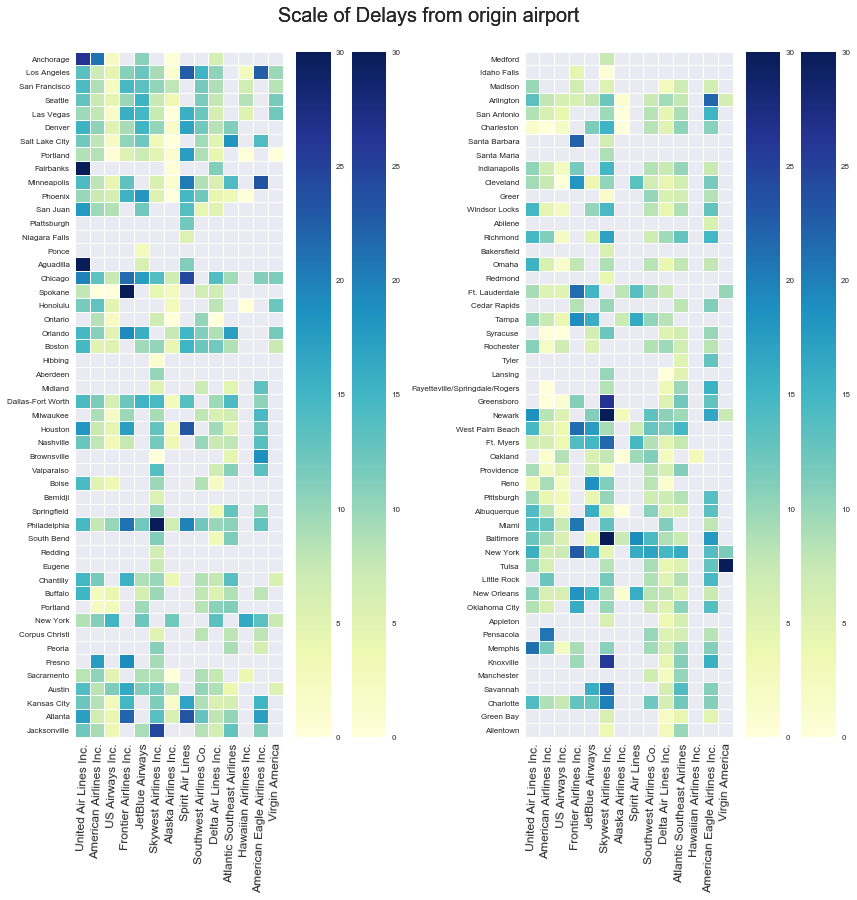

In [14]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Scale of Delays from origin airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
subset.to_csv("heat.csv", encoding='utf-8', index=False)

In [32]:
subset.shape

(50, 14)

In [36]:
subset.describe()

,United Air Lines Inc.,American Airlines Inc.,US Airways Inc.,Frontier Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Alaska Airlines Inc.,Spirit Air Lines,Southwest Airlines Co.,Delta Air Lines Inc.,Atlantic Southeast Airlines,Hawaiian Airlines Inc.,American Eagle Airlines Inc.,Virgin America
count,27.000000,32.000000,27.000000,20.000000,22.000000,43.000000,10.000000,9.000000,30.000000,41.000000,38.000000,1.000000,33.000000,5.000000
mean,11.544316,6.288628,3.955615,14.094493,10.835519,20.546825,1.605307,13.962083,9.457031,5.817908,8.787075,2.940026,11.724896,29.645795
std,4.245847,4.951129,2.405690,6.090098,5.088822,49.240783,4.770130,3.671352,2.399376,3.231298,2.850228,NaN,3.833678,46.641248
min,1.333333,-7.055556,-0.610759,4.500000,3.627389,0.678636,-6.709581,6.950658,6.529237,-3.250000,4.298499,2.940026,4.737490,6.361842
25%,9.336794,4.433891,2.371837,8.913407,5.941663,6.210578,-1.510300,13.455315,8.181084,4.211254,6.477212,2.940026,8.399293,7.337196
50%,10.750448,6.126467,3.792009,13.451478,11.260255,9.938886,0.987915,14.757091,8.622847,5.286285,8.542328,2.940026,11.704255,10.089213
75%,14.441296,8.381712,5.855918,19.324526,15.484075,13.837336,6.030612,15.954584,10.318248,7.261180,10.393191,2.940026,13.868472,11.440722
max,21.140187,20.649351,8.552542,22.988277,18.714286,299.500000,7.973054,19.063761,16.872353,14.722838,15.944128,2.940026,22.021538,113.000000


In [34]:
subset["US Airways Inc."]

0
Medford                                NaN
Idaho Falls                            NaN
Madison                                NaN
Arlington                         6.149469
San Antonio                       4.100917
Charleston                        2.015625
Santa Barbara                          NaN
Santa Maria                            NaN
Indianapolis                      2.393836
Cleveland                        -0.253568
Greer                                  NaN
Windsor Locks                     2.474138
Abilene                                NaN
Richmond                          2.350376
Bakersfield                            NaN
Omaha                             1.492711
Redmond                                NaN
Ft. Lauderdale                    5.039636
Cedar Rapids                           NaN
Tampa                             3.871795
Syracuse                         -0.610759
Rochester                         6.720779
Tyler                                  NaN
Lansing  

In [18]:
h = pd.melt(subset)

In [19]:
h

,variable,value
0,United Air Lines Inc.,NaN
1,United Air Lines Inc.,NaN
2,United Air Lines Inc.,9.925049
3,United Air Lines Inc.,13.305077
4,United Air Lines Inc.,8.556886
5,United Air Lines Inc.,1.333333
6,United Air Lines Inc.,NaN
7,United Air Lines Inc.,NaN
8,United Air Lines Inc.,10.415231
9,United Air Lines Inc.,9.448809
